In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from gensim.models import KeyedVectors
wv = KeyedVectors.load("/content/gdrive/MyDrive/musicrecom/wvsg25/word2vec.wordvectors", mmap='r')
wv

In [ ]:
import pandas as pd

df = pd.read_csv('/content/gdrive/MyDrive/musicrecom/user_songs.csv')


In [ ]:
df = df[df["count"] > 1]

In [ ]:
user_list = df["cookieid"].unique().tolist()

In [ ]:
len(user_list)

146856

In [ ]:
vectors = []
for user in user_list:
  try:
    vectors.append(wv[user])
  except KeyError:
    continue

In [ ]:
# ! pip install umap-learn

In [ ]:
import umap
import matplotlib.pyplot as plt

In [ ]:
standard_embedding = umap.UMAP(n_neighbors=15).fit_transform(vectors)


<ipython-input-23-4c9e266e82f0>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], cmap='Spectral', linewidths=0.1, marker='.', alpha=0.5)


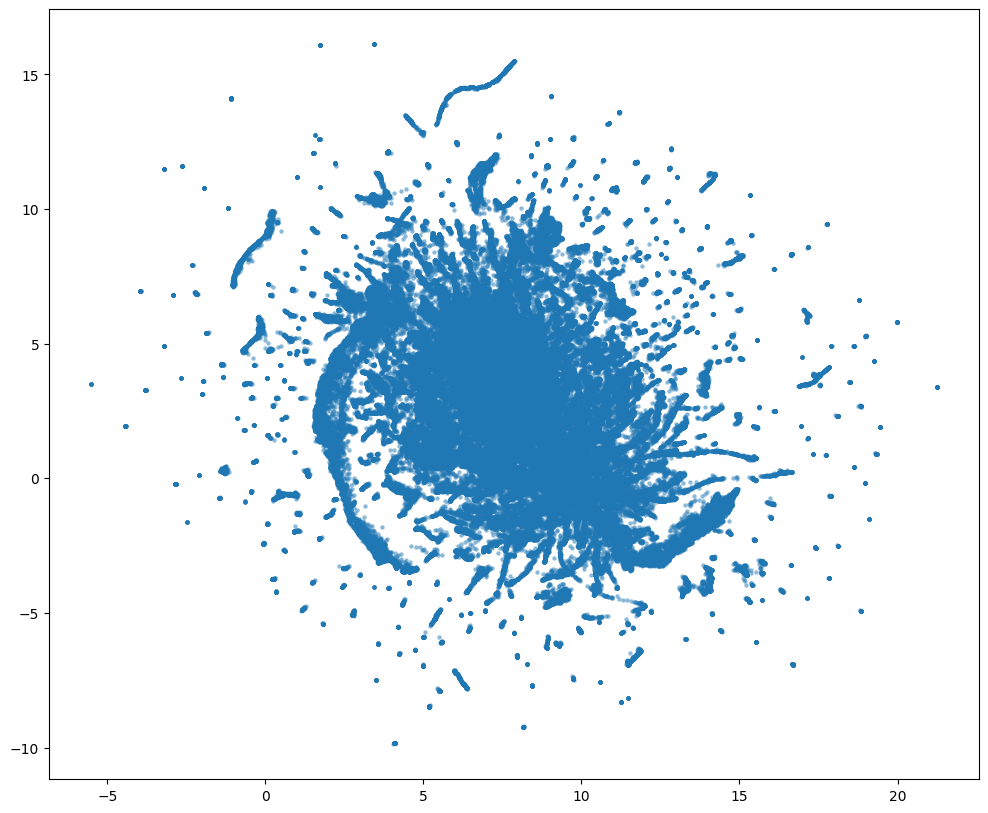

In [ ]:
fig, ax = plt.subplots(figsize=(12, 10))

plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], cmap='Spectral', linewidths=0.1, marker='.', alpha=0.5)

In [ ]:
# plt.savefig('/content/gdrive/MyDrive/musicrecom/umap/wv1n15')

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import mutual_info_score, adjusted_rand_score

In [ ]:
dbscan = DBSCAN()
dbscan.fit(vectors)

DBSCAN()

In [ ]:
silhouette = silhouette_score(vectors, dbscan.labels_)
db_index = davies_bouldin_score(vectors, dbscan.labels_)
ch_index = calinski_harabasz_score(vectors, dbscan.labels_)

# Print the metric scores
print(f"Silhouette Score: {silhouette:.2f}")
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: -0.37
Davies-Bouldin Index: 1.17
Calinski-Harabasz Index: 10.79
